In [1]:
import numpy as np
import pandas as pd

# Caravan Datensatz

In [2]:
caravan = pd.read_csv('caravan.csv')
caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


viele numerische Variablen und Purchase (Yes or No)

## 1 Evaluierungsmetrik
Accuracy ist nicht geeignet, da wir auch false negatives bewerten wollen.
f1-Metrik ist gut, um Modelle zu vergleichen.

## 2 Trainings- und Testdaten
80% zu 20% Aufteilung

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = caravan.drop('Purchase', axis=1)
y = caravan['Purchase']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4657, 85), (1165, 85), (4657,), (1165,))

## Logistische Regression
drei unterschiedliche Cut-Off-Werte

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [7]:
# replace Yes/No with 1/0
y_train = y_train.replace({'Yes': 1, 'No': 0})
y_test = y_test.replace({'Yes': 1, 'No': 0})

In [8]:
reg = LogisticRegression(max_iter=1000)
reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
# 3 different cutoff points
cutoffs = np.arange(0.05, 0.3, 0.05)

# show confusion matrix for each cutoff
for cutoff in cutoffs:
    print('Confusion matrix for cutoff =', cutoff)
    y_pred = (reg.predict_proba(X_test)[:, 1] >= cutoff).astype(int)
    print(confusion_matrix(y_test, y_pred))

Confusion matrix for cutoff = 0.05
[[709 392]
 [ 20  44]]
Confusion matrix for cutoff = 0.1
[[912 189]
 [ 37  27]]
Confusion matrix for cutoff = 0.15000000000000002
[[1006   95]
 [  44   20]]
Confusion matrix for cutoff = 0.2
[[1055   46]
 [  56    8]]
Confusion matrix for cutoff = 0.25
[[1074   27]
 [  58    6]]


Best f1 score: 0.22346368715083798
For cutoff:  0.15


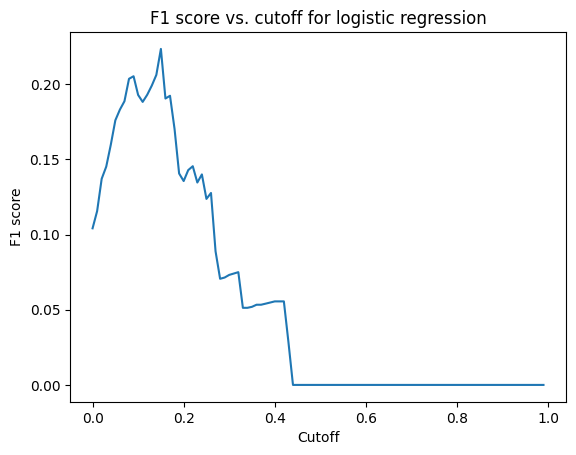

In [11]:
# f1 score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

cutoffs = np.arange(0, 1, 0.01)
f1_scores = []
for cutoff in cutoffs:
    y_pred = (reg.predict_proba(X_test)[:, 1] >= cutoff).astype(int)
    # plot f1 score
    f1_scores.append(f1_score(y_test, y_pred))

plt.plot(cutoffs, f1_scores)
plt.title('F1 score vs. cutoff for logistic regression')
plt.xlabel('Cutoff')
plt.ylabel('F1 score')
print('Best f1 score:', np.max(f1_scores))
print('For cutoff: ', cutoffs[np.argmax(f1_scores)])

## KNN-Klassifikator
mindestens 3 unterschiedliche k

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

    k = 1
Confusion matrix:
[[1030   71]
 [  55    9]]
f1 score: 0.125
    k = 2
Confusion matrix:
[[1090   11]
 [  63    1]]
f1 score: 0.02631578947368421
    k = 3
Confusion matrix:
[[1078   23]
 [  59    5]]
f1 score: 0.10869565217391304
    k = 4
Confusion matrix:
[[1096    5]
 [  64    0]]
f1 score: 0.0
    k = 5
Confusion matrix:
[[1092    9]
 [  63    1]]
f1 score: 0.02702702702702703
    k = 6
Confusion matrix:
[[1099    2]
 [  63    1]]
f1 score: 0.029850746268656716
    k = 7
Confusion matrix:
[[1096    5]
 [  63    1]]
f1 score: 0.02857142857142857
    k = 8
Confusion matrix:
[[1100    1]
 [  64    0]]
f1 score: 0.0
    k = 9
Confusion matrix:
[[1097    4]
 [  63    1]]
f1 score: 0.028985507246376812
    k = 10
Confusion matrix:
[[1098    3]
 [  63    1]]
f1 score: 0.029411764705882353
    k = 11
Confusion matrix:
[[1097    4]
 [  63    1]]
f1 score: 0.028985507246376812
    k = 12
Confusion matrix:
[[1100    1]
 [  64    0]]
f1 score: 0.0
    k = 13
Confusion matrix:
[[1100

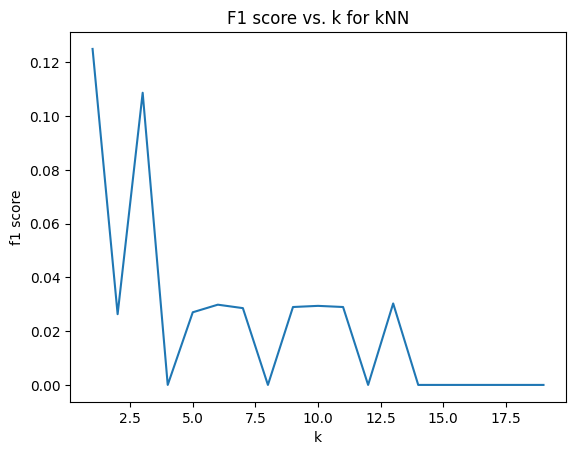

In [16]:
f1_scores = []
k_neighbors = range(1, 20)
for k in k_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    print('    k =', k)
    print('Confusion matrix:')
    print(confusion_matrix(y_test, knn.predict(X_test_scaled)))
    f1 = f1_score(y_test, knn.predict(X_test_scaled))
    f1_scores.append(f1)
    print('f1 score:', f1)

plt.plot(k_neighbors, f1_scores)
plt.title('F1 score vs. k for kNN')
plt.xlabel('k')
plt.ylabel('f1 score')
print('Best f1 score:', np.max(f1_scores))
print('For k =', k_neighbors[np.argmax(f1_scores)])

## 5 Bestes Modell
Wir haben für knn k=1 und logistic regression cutoff-point=0.14 die besten Ergebnisse gesehen. Wir schauen uns nocheinmal die Ergebnisse an.

In [18]:
print("Logistic Regression:")
y_pred = (reg.predict_proba(X_test)[:, 1] >= 0.15).astype(int)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("F1 Score:")
print(f1_score(y_test, y_pred))

Logistic Regression:
Confusion Matrix:
[[1006   95]
 [  44   20]]
F1 Score:
0.22346368715083798


In [19]:
print("kNN:")
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("F1 Score:")
print(f1_score(y_test, y_pred))

kNN:
Confusion Matrix:
[[1030   71]
 [  55    9]]
F1 Score:
0.125


### Evaluierung der Metriken
Wenn man rein von dem f1-score ausgeht ist das Modell der logistischen Regression besser geeignet. Allerdings ist der Recall-Wert bei der logistischen Regression sehr schlecht. Das bedeutet, dass wir sehr viele false negatives haben. Das bedeutet, dass wir sehr viele Kunden, die einen Caravan kaufen würden, nicht als solche erkennen.
Ich würde trotzdem behaupten, dass das Modell der logistischen Regression besser ist, da die true positives sehr hoch sind.